CS109 Final Project

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [2]:
import random
random_seed = 0
random.seed(random_seed)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)                           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline
pd.set_option('display.width', 1000)

In [3]:
mortality = pd.read_csv("Project_B_NHANESI_full.csv")
np.random.seed(random_seed)

# college_train, college_test = train_test_split(
#     college,
#     test_size=0.2,
#     random_state=random_seed,
#     shuffle=True,
#     stratify=college["school"],
# )
print(mortality.shape)
# print(college_train.shape, college_test.shape)

(14407, 42)


In [4]:
display(mortality.head())

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,platelets_estimate,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_albumin,urine_glucose,urine_pH,urine_hematest,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
0,20751,False,1,NaN,51,NaN,85.0,NaN,16.0,10.1,1.0,4.1,140.0,0.5,NaN,5.48,10.1,16.0,49.0,Normal,70.0,26.0,1.0,3.0,0.0,0.0,256.0,NaN,182.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,6.2,110.0,40.0,84.25,182.1,-16.952
1,20753,False,1,NaN,41,NaN,68.0,2.27,16.0,10.2,0.9,4.4,142.0,0.9,NaN,4.62,6.3,14.1,42.0,Normal,54.0,35.0,2.0,8.0,1.0,0.0,254.0,NaN,159.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,7.7,136.0,54.0,87.09,188.2,-17.200
2,20754,True,3,NaN,31,NaN,61.0,1.86,10.0,9.6,0.6,3.9,139.0,0.3,NaN,4.26,7.8,12.0,38.0,Normal,56.0,37.0,2.0,5.0,0.0,0.0,177.0,NaN,160.0,NaN,NaN,Negative,Negative,6.0,Negative,NaN,4.9,110.0,24.0,60.21,159.2,-17.630
3,20755,False,1,NaN,48,NaN,58.0,NaN,12.0,9.7,1.1,4.2,142.0,0.8,NaN,4.71,5.1,12.7,40.0,Normal,54.0,33.0,4.0,8.0,1.0,0.0,209.0,NaN,153.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,8.4,126.0,36.0,88.22,175.6,-17.271
4,20756,True,1,NaN,29,NaN,37.0,1.69,19.0,9.3,1.1,4.2,140.0,0.7,NaN,4.23,5.2,12.3,40.0,Normal,65.0,34.0,1.0,0.0,0.0,0.0,206.0,NaN,156.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,4.3,98.0,36.0,51.37,163.5,-17.132


In [5]:
display(mortality.describe())

,sequence_ID,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
count,14407.000,14407.000,11348.000,14407.000,10801.000,6364.000,6315.000,2935.000,6256.000,2591.000,2992.000,3003.000,5854.000,10800.000,10513.000,12959.000,13373.000,13631.000,5854.000,5854.000,5854.000,5854.000,5854.000,5854.000,13970.000,9943.000,13814.000,10149.000,9932.000,13695.000,10308.000,6651.000,14339.000,14335.000,14338.000,14361.000,14407.000
mean,13109.294,1.174,285.289,48.945,4.360,60.204,2.429,14.807,9.671,1.008,4.069,142.368,0.514,7.106,4.719,7.475,14.370,42.741,58.232,36.207,3.156,2.015,0.131,0.251,220.819,101.122,168.370,362.766,28.556,5.631,16.182,5.527,134.170,50.667,70.994,166.255,-9.110
std,7376.748,0.408,223.321,15.590,0.329,25.888,1.490,4.463,0.479,0.284,0.344,3.114,0.257,0.511,0.485,2.207,1.505,3.997,9.974,9.876,2.681,2.084,0.393,1.090,48.441,37.247,14.331,59.969,11.233,0.774,11.482,1.470,24.412,18.028,15.751,9.175,14.398
min,1.000,1.000,2.000,25.000,2.700,4.800,0.270,0.800,0.200,0.400,2.700,121.000,0.100,4.400,2.140,2.100,5.000,19.000,2.000,3.000,0.000,0.000,0.000,0.000,53.000,17.000,82.000,112.000,3.200,5.000,1.000,0.700,80.000,10.000,27.900,132.800,-22.060
25%,6711.500,1.000,129.000,35.000,4.200,45.000,1.800,12.000,9.400,0.900,3.800,141.000,0.380,6.800,4.390,6.000,13.300,40.000,52.000,30.000,1.000,0.000,0.000,0.000,187.000,75.000,159.000,322.000,21.000,5.000,7.000,4.500,118.000,38.000,59.530,159.500,-19.885
50%,13313.000,1.000,229.000,48.000,4.400,57.000,2.200,14.000,9.700,1.000,4.100,143.000,0.500,7.100,4.700,7.200,14.300,43.000,58.000,36.000,3.000,1.000,0.000,0.000,217.000,96.000,168.000,356.000,27.200,5.000,14.000,5.400,130.000,48.000,69.170,165.500,-18.028
75%,19835.500,1.000,358.000,65.000,4.600,70.000,2.600,17.000,10.000,1.100,4.300,144.000,0.600,7.400,5.030,8.600,15.400,45.000,65.000,42.000,5.000,3.000,0.000,0.000,249.000,122.000,177.000,396.000,34.600,6.000,22.000,6.500,148.000,60.000,80.290,172.700,6.179
max,25061.000,3.000,999.000,75.000,5.700,580.000,31.000,49.000,12.500,9.000,5.400,157.000,5.200,13.300,6.990,56.000,22.400,68.000,94.000,95.000,20.000,17.000,3.000,22.000,793.000,396.000,289.000,717.000,100.000,9.000,72.000,12.500,270.000,170.000,181.440,205.000,21.474


In [6]:
display(mortality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14407 entries, 0 to 14406
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sequence_ID                  14407 non-null  int64  
 1   sex_isFemale                 14407 non-null  bool   
 2   race                         14407 non-null  int64  
 3   poverty_index                11348 non-null  float64
 4   age                          14407 non-null  int64  
 5   serum_albumin                10801 non-null  float64
 6   alkaline_phosphatase         6364 non-null   float64
 7   SGOT                         6315 non-null   float64
 8   BUN                          2935 non-null   float64
 9   calcium                      6256 non-null   float64
 10  creatinine                   2591 non-null   float64
 11  potassium                    2992 non-null   float64
 12  sodium                       3003 non-null   float64
 13  total_bilirubin 

None

In [7]:
# You'll need to install missingno the first time you run this notebook
!pip install missingno

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


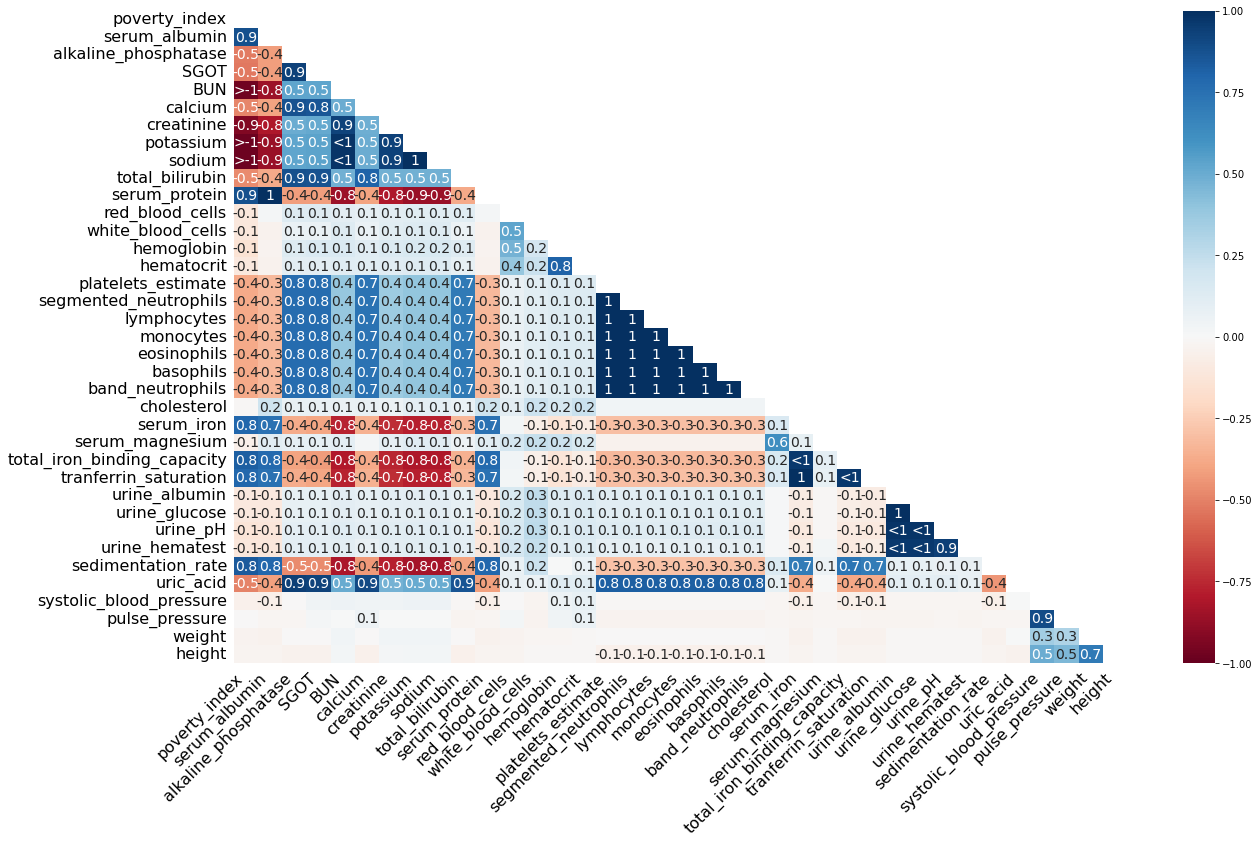

In [8]:
import missingno as msno
msno.heatmap(mortality.sample(500));

In [9]:
mortality_datatypes = pd.DataFrame(mortality.dtypes)
mortality_null_count = mortality.count()
print(mortality_datatypes.to_latex())
print(mortality_null_count.to_latex())

\begin{tabular}{ll}
\toprule
{} &        0 \\
\midrule
sequence\_ID                 &    int64 \\
sex\_isFemale                &     bool \\
race                        &    int64 \\
poverty\_index               &  float64 \\
age                         &    int64 \\
serum\_albumin               &  float64 \\
alkaline\_phosphatase        &  float64 \\
SGOT                        &  float64 \\
BUN                         &  float64 \\
calcium                     &  float64 \\
creatinine                  &  float64 \\
potassium                   &  float64 \\
sodium                      &  float64 \\
total\_bilirubin             &  float64 \\
serum\_protein               &  float64 \\
red\_blood\_cells             &  float64 \\
white\_blood\_cells           &  float64 \\
hemoglobin                  &  float64 \\
hematocrit                  &  float64 \\
platelets\_estimate          &   object \\
segmented\_neutrophils       &  float64 \\
lymphocytes                 &  float64 \\
monocyte

In [10]:
column_info = pd.concat([pd.DataFrame(mortality.dtypes), mortality.count()], axis=1)
display(column_info)
print(column_info.to_latex())

,0,0
sequence_ID,int64,14407
sex_isFemale,bool,14407
race,int64,14407
poverty_index,float64,11348
age,int64,14407
serum_albumin,float64,10801
alkaline_phosphatase,float64,6364
SGOT,float64,6315
BUN,float64,2935
calcium,float64,6256


\begin{tabular}{llr}
\toprule
{} &        0 &      0 \\
\midrule
sequence\_ID                 &    int64 &  14407 \\
sex\_isFemale                &     bool &  14407 \\
race                        &    int64 &  14407 \\
poverty\_index               &  float64 &  11348 \\
age                         &    int64 &  14407 \\
serum\_albumin               &  float64 &  10801 \\
alkaline\_phosphatase        &  float64 &   6364 \\
SGOT                        &  float64 &   6315 \\
BUN                         &  float64 &   2935 \\
calcium                     &  float64 &   6256 \\
creatinine                  &  float64 &   2591 \\
potassium                   &  float64 &   2992 \\
sodium                      &  float64 &   3003 \\
total\_bilirubin             &  float64 &   5854 \\
serum\_protein               &  float64 &  10800 \\
red\_blood\_cells             &  float64 &  10513 \\
white\_blood\_cells           &  float64 &  12959 \\
hemoglobin                  &  float64 &  13373 \\
hemato

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24ab17b8-b2f8-4eb1-897f-b86e4cf16ad8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>